## Task 2 - Plotting using Seaborn 


`seaborn` is a statistical data visualization library layer that provides a high-level interface for drawing statistical graphics and some convenient functions for plotting data frames.

You may need to install `seaborn`

`conda install seaborn`<br>

and just in case it's not the latest version, go ahead and update it:

`conda update seaborn`


In [1]:
# Usually all the import statements are at the top of the file

import pandas as pd
import seaborn as sns
import numpy as np
import os

In [2]:
# Themes and colours in Seaborn

# There are five preset seaborn themes: darkgrid, whitegrid, dark, white, and ticks. 
# They are each suited to different applications and personal preferences.
# You can see what they look like [here](https://seaborn.pydata.org/tutorial/aesthetics.html#seaborn-figure-styles)

# Just for fun, we're going to set the theme to be a nice one:
sns.set_theme(style="ticks",
              font_scale=1.3, # This scales the fonts slightly higher
             )
# And we're going to remove the top and right axis lines
import matplotlib.pyplot as plt
plt.rc("axes.spines", top=False, right=False)

### 2.1: Load data 

Without downloading the csv file to your repo, load the "*BCCDC_COVID19.csv*" file using the direct URL: "[BCCDC_COVID19_Dashboard_Case_Details.csv](http://www.bccdc.ca/Health-Info-Site/Documents/BCCDC_COVID19_Dashboard_Case_Details.csv)".

**DO NOT DOWNLOAD THE DATA TO YOUR REPOSITORY!**

Use `pandas` module/package and the `read_csv()` function to load the data by passing in the URL and then save the data in a variable called `df`.

In [3]:
# Your Solution here
df = pd.read_csv("http://www.bccdc.ca/Health-Info-Site/Documents/BCCDC_COVID19_Dashboard_Case_Details.csv")
df

,Reported_Date,HA,Sex,Age_Group,Classification_Reported
0,2020-01-29,Out of Canada,M,40-49,Lab-diagnosed
1,2020-02-06,Vancouver Coastal,F,50-59,Lab-diagnosed
2,2020-02-10,Out of Canada,F,20-29,Lab-diagnosed
3,2020-02-10,Out of Canada,M,30-39,Lab-diagnosed
4,2020-02-18,Interior,F,30-39,Lab-diagnosed
...,...,...,...,...,...
387931,2022-10-29,Northern,M,60-69,Lab-diagnosed
387932,2022-10-29,Interior,F,80-89,Lab-diagnosed
387933,2022-10-29,Vancouver Island,F,80-89,Lab-diagnosed
387934,2022-10-29,Vancouver Coastal,M,30-39,Lab-diagnosed


### 2.2: Counts of cases by Sex 
Using [`sns.countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot), plot the number of all female and male cases. 

Set the title to be "Number of COVID-19 cases by Sex". 

*Hint: The documentation above contains some examples that might help you get started*

#### Sample output
<img src="./images/bar1.png" width="400px" />

<AxesSubplot:xlabel='count', ylabel='Sex'>

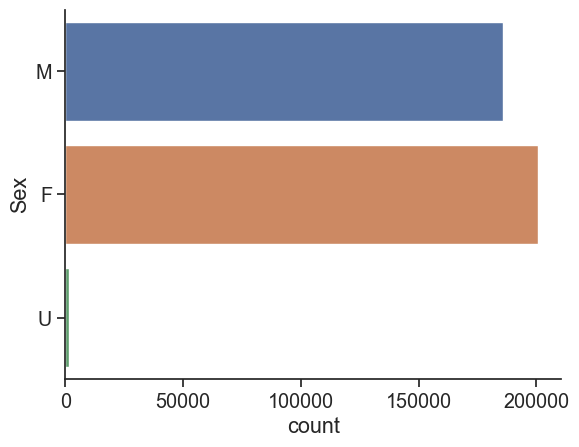

In [13]:
# Your Solution here
sns.countplot(data = df, y = "Sex")

### 2.3: Counts of cases by Age Group 

Plot the counts of cases by age group, and order the y-axis by increasing age (use the `order` parameter of the `countplot()` function).

<img src="images/bar_age.png" width="400px">

<AxesSubplot:xlabel='count', ylabel='Age_Group'>

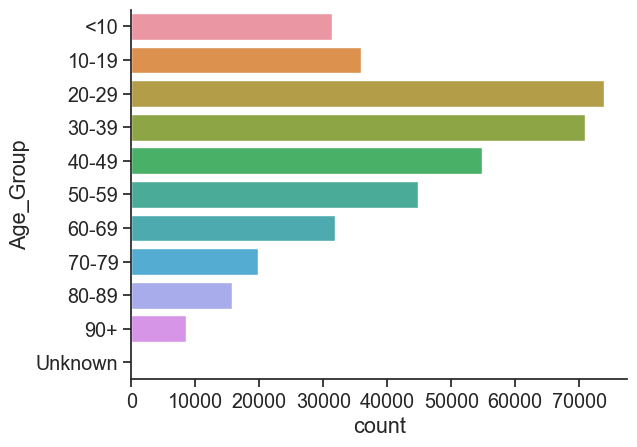

In [4]:
# Your Solution here
ageOrder = ["<10", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90+", "Unknown"]
sns.countplot(data = df, y = "Age_Group", order = ageOrder)

### 2.4: Cases by regional health authority 

Using `set()` data type, find the all the different regions in `df['HA']`. In the next step, print the set containing the different regions. Finally, using [`sns.countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot), plot a horizontal bar chart of number of cases based on their regions.


*Hint: Your plot doesn't have to look exactly like this, but please do explore the [possible color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html). You can specify the colour palette by passing in the keyword like this: `palette='colorblind'`.*

#### Sample output
<img src="images/hbar.png" width="400px" />

{'Vancouver Island', 'Fraser', 'Vancouver Coastal', 'Northern', 'Interior', 'Out of Canada'}


<AxesSubplot:xlabel='count', ylabel='HA'>

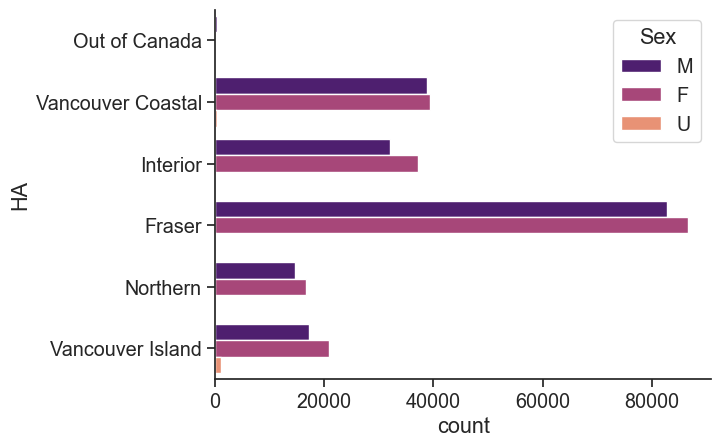

In [43]:
# Your solution here
region = set(df['HA'])
print(region)

sns.countplot(data = df, y = 'HA', hue = 'Sex', palette = 'magma')

### 2.5: Data Wrangling I 

**Task: Add a new column to the dataframe to convert the "Reported_Date" column to a datetime object**

To do this, first we need to add a new column to our dataset to turn the column "Reported_Date" into a proper datetime object so we can do operations on it.

*Hint: Use to [to_datetime()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) function to help you first convert it into a datetime object, and then remove the timezone information and HH:MM:SS using [`.dt.date`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.date.html).*

In [50]:
# Your Solution here


AttributeError: 'Series' object has no attribute 'to_datetime'

### 2.6: Data Wrangling II

**Task: Find the earliest reported case and the latest reported case of COVID-19 in the dataset**

You should use the pandas .min() and .max() functions here, now that your date string is converted to a DateTime object.

#### Sample Output

> The earliest reported case of COVID-19 was: 2020-01-29 <br>
> The latest reported case of COVID-19 was: 2020-10-14 <br>

In [8]:
# Your Solution here

### 2.7: Data Wrangling III 

**Task: Create a new column in the data frame called "days_since".**

This column will be of type integer, and will simply show the days since the first reported case of COVID-19.

*Hint: Subtracting the earliest reported date from the `Reported_Date_Object` column will get you most of the way there. After that, the only thing left to is to turn the result (a datetime object) into an integer using [`.dt.days`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.days.html?highlight=dt.days#pandas.Series.dt.days).*

In [9]:
# Your Solution here

### 2.8: Plot the COVID-19 cases plotted over time by sex

Using `sns.displot`, plot the histogram of females and males cases over time.

*Hint 1: [Here is a nice tutorial](https://seaborn.pydata.org/tutorial/distributions.html) of all the different options that are possible when creating a histogram.*

#### Sample output
<img src="images/hist.png" width="600px">

In [10]:
# Your Solution here 

### 2.9: BONUS - For a bonus mark, move the legend to the top left of the plot

*Remember, the maximum mark you can get on a lab is 100% and bonus marks cannot be "moved" to different assignments"*

In [11]:
# Your Solution here

### 2.10: BONUS - For a bonus mark, order the Health authorities plot (2.4) on the y-axis 

You can order it by some metric (either alphabetically, or by total counts, or some other sensible metric).

*Remember, the maximum mark you can get on a lab is 100% and bonus marks cannot be "moved" to different assignments"*

In [ ]:
# Your Solution here